This notebook makes a histogram from the alignment factor data calculated in Network_inclination_measurement notebook in this directory

### Setup and imports

Import the relevant codes, set the plotting style

In [1]:
%matplotlib inline
import sys
import numpy as np
from numpy import *
import pylab as plt
import simple_pe
from simple_pe import localize
import lal
# from simple_pe import cosmology
import logging

import scipy.integrate as integrate
from scipy.integrate import quad

import astropy.units as u

# from mpl_toolkits.basemap import Basemap
import pylab

sys.path.append('')
sys.path.append('simple_pe')

import fstat
import likelihood
from scipy.stats import norm


/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.4/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Set the plotting parameters:

In [2]:
plt.rcParams.update({
    "lines.markersize": 6,
    "lines.markeredgewidth": 1.5,
    "lines.linewidth": 1.0,
    "font.size": 20,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 20,
})

# Read in alphas

Read in data calculated in Network_inclination_measurement notebook in this directory

In [3]:
generation = '2G'

In [4]:
events = ["GW150914", "LVT151012", "GW151226", "GW170104", "GW170608", "GW170729", "GW170809", "GW170814", "GW170817", "GW170818", "GW170823"]
alphas_dict = {}
timedelay_dict = {}
h1_fplus_dict = {}
h1_fcross_dict = {}
l1_fplus_dict = {}
l1_fcross_dict = {}
for event in events:
    try: cosis, p_face_on, alphas, timedelay, h1fplus, h1fcross, l1fplus, l1fcross = loadtxt('network_data/%s_cosi_P_face-on_alpha.txt' % event)
    except: 
        cosis, p_face_on, alphas, fplus, timedelay = loadtxt('network_data/%s_cosi_P_face-on_alpha_fplus.txt' % event)
    alphas_dict[event] = alphas
    timedelay_dict[event] = timedelay
    h1_fplus_dict[event] = h1fplus
    h1_fcross_dict[event] = h1fcross
    l1_fplus_dict[event] = l1fplus
    l1_fcross_dict[event] = l1fcross

# Plot distribution of $\alpha$ for each network 

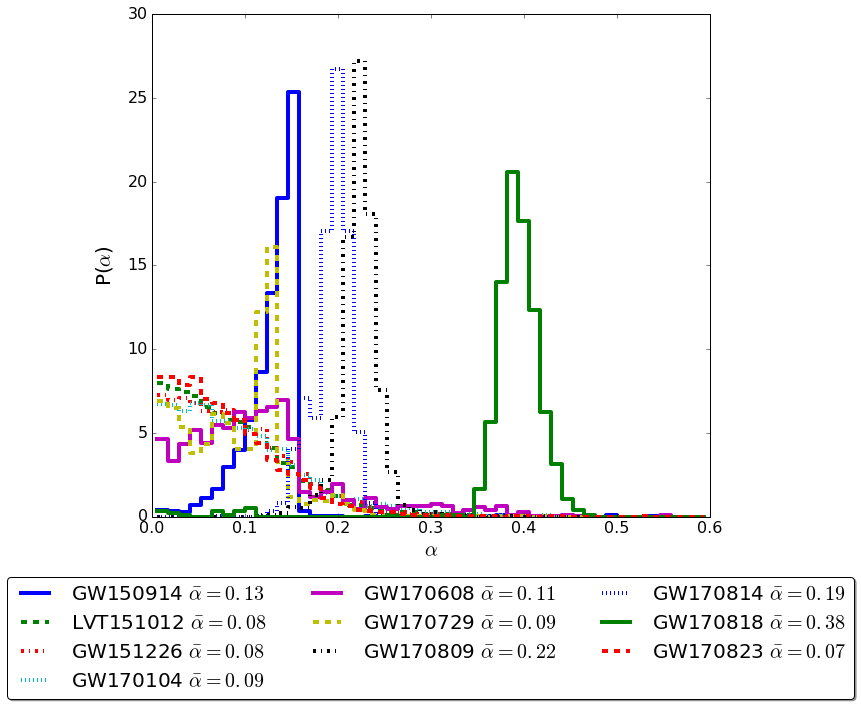

In [5]:
num_bins = 50

events = ["GW150914", "LVT151012", "GW151226", "GW170104", "GW170608", "GW170729", "GW170809", "GW170814", "GW170818", "GW170823"]
styles = ['-','--','-.',':','-','--','-.',':','-','--']

fig = plt.figure("dist of alphas", figsize=(10,9))

ax = fig.add_subplot(111)
for event, lsi in zip(events, styles):
    h, b = np.histogram(alphas_dict[event], bins=np.linspace(0, .6, num_bins+2, endpoint=True), density=True)

    
    ax.plot((b[1:]+b[:-1])/2., h,  drawstyle = 'steps-post', 
            label='%s $\\bar{\\alpha} = %.2f$' % (event, mean(alphas_dict[event])), ls = lsi, lw=4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fancybox=True, shadow=True)
plt.xlabel("$\\alpha$")
plt.ylabel("P($\\alpha$)", labelpad= 12.)
#plt.savefig("detection_alphas.png")

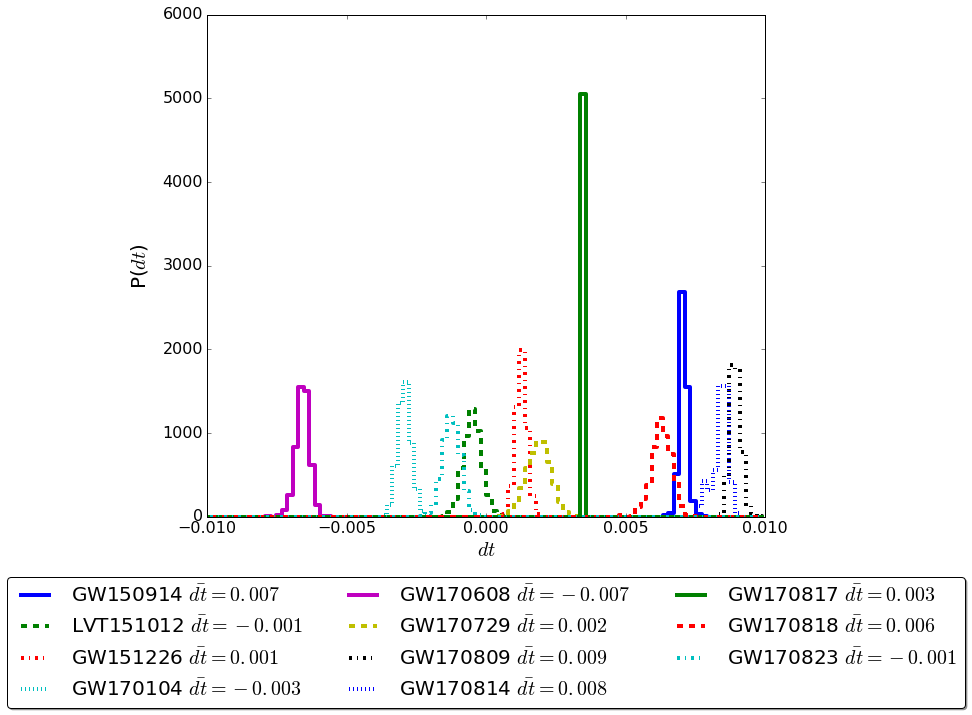

In [6]:
num_bins = 100

events = ["GW150914", "LVT151012", "GW151226", "GW170104", "GW170608", "GW170729", "GW170809", "GW170814", "GW170817", "GW170818", "GW170823"]
styles = ['-','--','-.',':','-','--','-.',':','-','--','-.']

fig = plt.figure("dist of alphas", figsize=(10,9))



ax = fig.add_subplot(111)
for event, lsi in zip(events, styles):
    h, b = np.histogram(timedelay_dict[event], bins=np.linspace(-.01, .01, num_bins+2, endpoint=True), density=True)

    
    ax.plot((b[1:]+b[:-1])/2., h,  drawstyle = 'steps-post', 
    label='%s $\\bar{dt} = %.3f$' % (event, mean(timedelay_dict[event])), ls = lsi, lw=4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fancybox=True, shadow=True)
plt.xlabel("$dt$")
plt.ylabel("P($dt$)", labelpad= 12.)

plt.savefig("timediff.png")

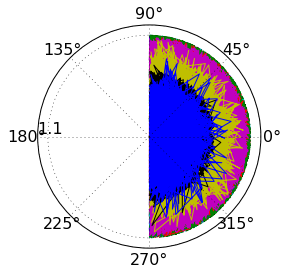

In [18]:
fig = plt.figure()
for event in events[::-1]:
    ax = fig.add_subplot(111, projection = 'polar')
    plt.plot(arctan(h1_fcross_dict[event]/h1_fplus_dict[event]), sqrt(h1_fplus_dict[event]**2 + h1_fcross_dict[event]**2))
    plt.plot(arctan(l1_fcross_dict[event]/l1_fplus_dict[event]), sqrt(l1_fplus_dict[event]**2 + l1_fcross_dict[event]**2))
    plt.rgrids((1,1.1),('','1.1'), angle = 180)
plt.savefig("complex_alpha/all_events.png")
plt.show()

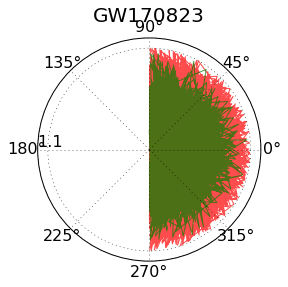

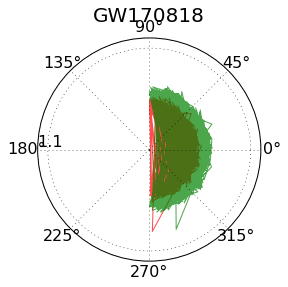

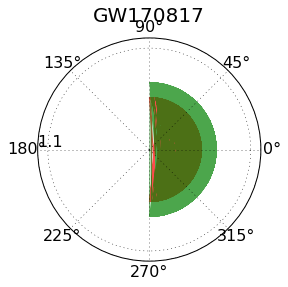

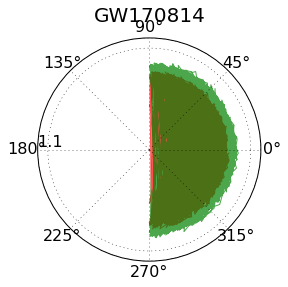

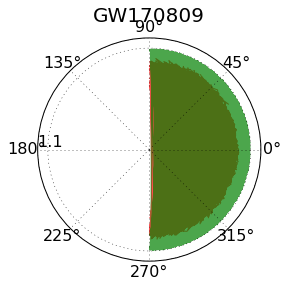

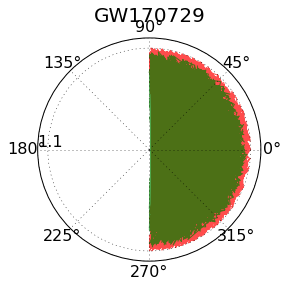

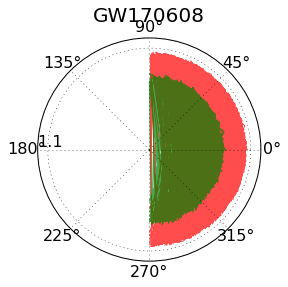

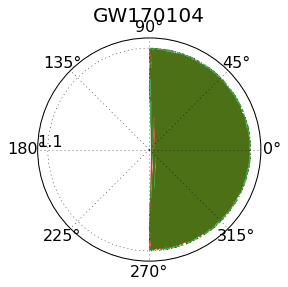

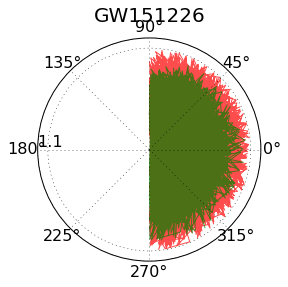

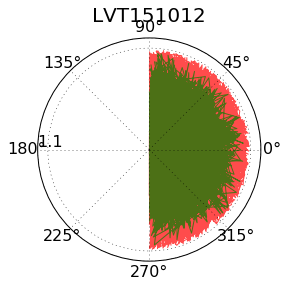

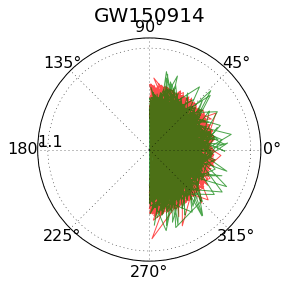

In [22]:
for event in events[::-1]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = 'polar')
    plt.plot(arctan(h1_fcross_dict[event]/h1_fplus_dict[event]), sqrt(h1_fplus_dict[event]**2 + h1_fcross_dict[event]**2), color = "r", alpha = 0.7)
    plt.plot(arctan(l1_fcross_dict[event]/l1_fplus_dict[event]), sqrt(l1_fplus_dict[event]**2 + l1_fcross_dict[event]**2), color = "g", alpha = 0.7)
    plt.title("%s" %event)
    plt.rgrids((1,1.1),('','1.1'), angle = 180)
    plt.savefig("complex_alpha/%s.png" %event)
    plt.show()